# I. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt

# II. Đọc Data vào Dataframe. Data được thu thập thủ công từ trang https://www.worldometers.info/coronavirus/ vào ngày 04/05/2022

In [42]:
Data = pd.read_csv('data.csv',sep=';')

In [3]:
Data

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
0,NaN,World,"513,697,783","154,755","6,262,191",623.0,"467,939,862","337,659","39,495,730","40,904","65,903",803.4,NaN,NaN,NaN
1,1.0,USA,"83,356,490","71,798","1,023,513",305.0,"80,836,418","38,675","1,496,559","1,655","249,149","3,059","1,008,201,262","3,013,472","334,564,690"
2,2.0,India,"43,091,299","2,898","523,92",NaN,"42,544,689",NaN,"22,69",698,"30,672",373,"838,628,250","596,93","1,404,902,630"
3,3.0,Brazil,"30,502,501","20,072","663,816",51.0,"29,602,372","17,068","236,313","8,318","141,653","3,083","63,776,166","296,176","215,332,283"
4,4.0,France,"28,805,690","47,925","146,376",114.0,"27,301,135","137,222","1,358,179","1,511","439,523","2,233","269,816,888","4,116,918","65,538,567"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224.0,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
225,225.0,Niue,9,NaN,NaN,NaN,8,1,1,NaN,"5,468",NaN,NaN,NaN,"1,646"
226,226.0,Micronesia,7,NaN,NaN,NaN,1,NaN,6,NaN,60,NaN,NaN,NaN,"117,236"
227,227.0,Nauru,5,NaN,NaN,NaN,3,NaN,2,NaN,457,NaN,NaN,NaN,"10,949"


# III. Tiền xử lí dữ liệu

#### - Thay những dòng có giá trị NAN bằng 0, xóa một số cột không cần thiết

In [44]:
def data_preprocessing(Data):
    for col_name in Data:
        temp = []     
        for col in Data[col_name]:
            col = str(col)
            col = col.replace(',','')
            try:   
                col = int(col)
            except:
                pass
            temp.append(col)
        Data[col_name] = temp
    return Data

In [46]:
Data = Data.fillna(0)
Data = data_preprocessing(Data) 
Data.drop("#", axis=1, inplace=True)
Data = Data.drop([0])


KeyError: "['#'] not found in axis"

array([305,  51, 114, 222, 227, 129,  72, 152,   7,   3,   4,  52,  56,
        16,   1,  82,  17,  30,  27,  14,  36,  35,   6,   5,  11,   2,
         8,  22])

# IV. Trực quan hóa với các mô hình

## 1. Số lượng các ca nhiễm mới giữa các nước.
(Trường được chọn: "New Case")

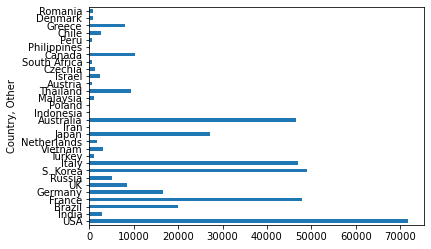

In [17]:
#Data = Data.set_index('Country, Other')
NewCase_df = Data.drop(Data[Data['New Cases'] == 0].index)
NewCase_df = NewCase_df['New Cases']
barh = NewCase_df.head(30).plot.barh()

In [ ]:
 - Nhìn vào biểu đồ có thể thấy số lượng ca nhiễm giữa các nước chênh lệch khá lớn

## 2. Tỉ lệ các ca nhiễm tử vong giữa các nước
(Trường được chọn: "New Deaths" , "Active Cases")

In [69]:
Deadpercent_df = Data.copy()
Deadpercent_df['New Deaths'] = Deadpercent_df['New Deaths'].astype(float)
Deadpercent_df['New Deaths'] = Deadpercent_df['New Deaths'].astype(int)
Deadpercent_df = Deadpercent_df.drop(Deadpercent_df[Deadpercent_df['New Deaths'] == 0].index)
Deadpercent_df = Deadpercent_df.drop(Deadpercent_df[Deadpercent_df['Active Cases'] == 0 ].index)
Deadpercent_df = Deadpercent_df[["Country, Other", "New Deaths", "Active Cases"]]
Deadpercent_df['percent'] = (Deadpercent_df['New Deaths']/ Deadpercent_df['Active Cases'])*100
Deadpercent_df

,"Country, Other",New Deaths,Active Cases,percent
1,USA,305,1496559,0.020380
3,Brazil,51,236313,0.021582
4,France,114,1358179,0.008394
5,Germany,222,2138658,0.010380
6,UK,227,51892,0.437447
7,Russia,129,25981,0.496517
9,Italy,152,1187070,0.012805
10,Turkey,7,4405,0.158910
12,Vietnam,3,1310063,0.000229
14,Netherlands,4,133699,0.002992


## 3. Top 10 quốc gia có tổng số ca nhiễm cao nhất thế giới 

(Trường được chọn: "Country, Other" và "Total Cases")

In [28]:
df_groupbyCase=Data.groupby("Country, Other",axis=0).sum()
df_groupbyCase.sort_values(by="Total Cases",ascending=False,axis=0,inplace=True)
df_groupbyCase=df_groupbyCase.head(10)
df_groupbyCase=df_groupbyCase["Total Cases"]
df_groupbyCase

Country, Other
USA         83356490
India       43091299
Brazil      30502501
France      28805690
Germany     25116363
UK          22090523
Russia      18206167
S. Korea    17395791
Italy       16633911
Turkey      15037242
Name: Total Cases, dtype: int64

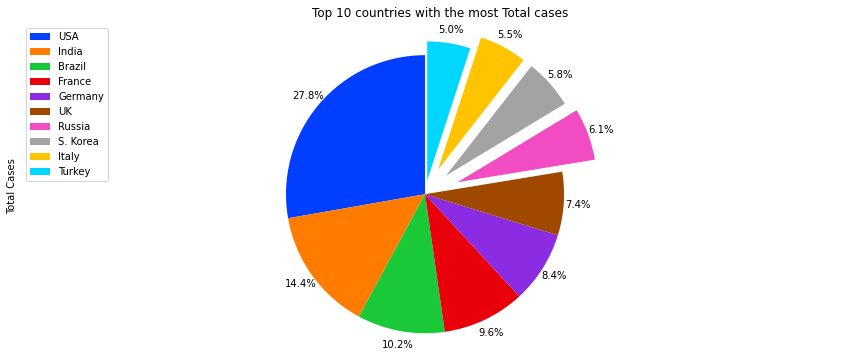

In [29]:
explode_list=[0,0,0,0,0,0,0.25,0.2,0.2,0.1]
df_groupbyCase.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,labels=None,pctdistance=1.1
                            ,explode=explode_list,colors = sns.color_palette('bright')[0:10])
plt.title("Top 10 countries with the most Total cases")
plt.axis('equal')
plt.legend(labels=df_groupbyCase.index,loc='upper left');

## 4. Biểu đồ thể hiện tương quan trong các ca nhiễm 

(Trường được chọn: "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "Active Cases", "Serious, Critical")

In [11]:
features = ["Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious, Critical"]
case_corr = Data[features].corr()
case_corr

,Total Cases,New Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
Total Cases,1.000000,0.712835,0.852236,0.985483,0.611571,0.458879
New Cases,0.712835,1.000000,0.593193,0.657445,0.601061,0.288863
Total Deaths,0.852236,0.593193,1.000000,0.853311,0.462743,0.576947
Total Recovered,0.985483,0.657445,0.853311,1.000000,0.603662,0.455865
Active Cases,0.611571,0.601061,0.462743,0.603662,1.000000,0.298065
"Serious, Critical",0.458879,0.288863,0.576947,0.455865,0.298065,1.000000


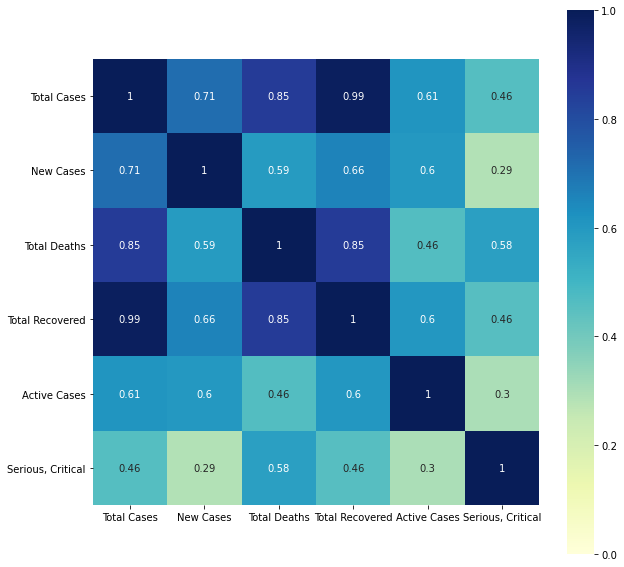

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(case_corr,cmap="YlGnBu",vmin=0, annot=True, square=True);

Nhiều trường có mối quan hệ nhân quả (cause-effect) với nhau, ví dụ như tỉ lệ giữa số ca nhiễm - số ca chết, số ca nhiễm - số ca hồi phục và số ca nghiêm trọng - số ca chết)

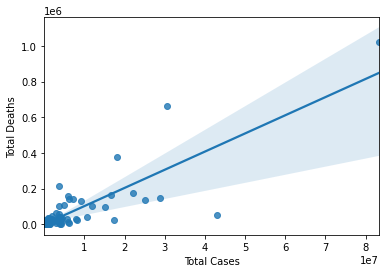

In [13]:
sns.regplot(x="Total Cases",y="Total Deaths",data=Data);

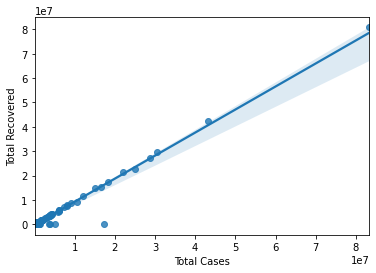

In [14]:
sns.regplot(x="Total Cases",y="Total Recovered",data=Data);

Ta thấy tỉ lệ giữa số ca mắc so với số ca tử vong/hồi phục rất đều nhau, nghĩa là càng có nhiều người nhiễm bệnh thì số người chết và số người hết bệnh cũng tăng với tỉ lệ gần như tương tự.

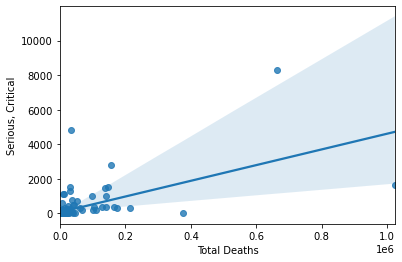

In [15]:
sns.regplot(x="Total Deaths",y="Serious, Critical",data=Data);

Trái ngược với nhận ở trên, tỉ lệ giữa số ca nghiêm trọng/số ca tử vong ngày càng cách xa nhau, tức là nhiều ca nghiêm trọng cũng không hẳn là số ca tử vong cũng tăng tới tỉ lệ tương tự.

### 